In [40]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import pandas as pd
import matplotlib.pyplot as plt

In [41]:
df_sent = pd.read_csv('winemag-data_first150k.csv', index_col =[0])

In [42]:
df_sent.head(10)

,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude
5,Spain,"Deep, dense and pure from the opening bell, th...",Numanthia,95,73.0,Northern Spain,Toro,NaN,Tinta de Toro,Numanthia
6,Spain,Slightly gritty black-fruit aromas include a s...,San Román,95,65.0,Northern Spain,Toro,NaN,Tinta de Toro,Maurodos
7,Spain,Lush cedary black-fruit aromas are luxe and of...,Carodorum Único Crianza,95,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
8,US,This re-named vineyard was formerly bottled as...,Silice,95,65.0,Oregon,Chehalem Mountains,Willamette Valley,Pinot Noir,Bergström
9,US,The producer sources from two blocks of the vi...,Gap's Crown Vineyard,95,60.0,California,Sonoma Coast,Sonoma,Pinot Noir,Blue Farm


In [43]:
df_sent.count()

country        150925
description    150930
designation    105195
points         150930
price          137235
province       150925
region_1       125870
region_2        60953
variety        150930
winery         150930
dtype: int64

In [44]:
df_sent = df_sent.drop(columns = ['country','designation', 'region_1','region_2','variety','winery','price','province'])
df_sent.head()

,description,points
0,This tremendous 100% varietal wine hails from ...,96
1,"Ripe aromas of fig, blackberry and cassis are ...",96
2,Mac Watson honors the memory of a wine once ma...,96
3,"This spent 20 months in 30% new French oak, an...",96
4,"This is the top wine from La Bégude, named aft...",95


In [45]:
df_sent.count()
df_sent.isnull().sum()

description    0
points         0
dtype: int64

In [38]:
df_sent["bool_series"]= df_sent["description"].str.isalpha()
df_sent.head(10)
df_sent['bool_series'] == 'False'


0         False
1         False
2         False
3         False
4         False
          ...  
150925    False
150926    False
150927    False
150928    False
150929    False
Name: bool_series, Length: 150930, dtype: bool

In [39]:
df_sent = df_sent.drop(columns = ['bool_series'])

In [46]:
df_sent.count()

description    150930
points         150930
dtype: int64

In [47]:
df_sent.drop_duplicates(inplace = True)
df_sent.count()

description    97831
points         97831
dtype: int64

In [48]:
sia = SentimentIntensityAnalyzer()

In [49]:
## add the second file also
df_sent1 = pd.read_csv('winemag-data-130k-v2.csv', index_col = [0])
df_sent1.head(10)

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks
5,Spain,Blackberry and raspberry aromas show a typical...,Ars In Vitro,87,15.0,Northern Spain,Navarra,NaN,Michael Schachner,@wineschach,Tandem 2011 Ars In Vitro Tempranillo-Merlot (N...,Tempranillo-Merlot,Tandem
6,Italy,"Here's a bright, informal red that opens with ...",Belsito,87,16.0,Sicily & Sardinia,Vittoria,NaN,Kerin O’Keefe,@kerinokeefe,Terre di Giurfo 2013 Belsito Frappato (Vittoria),Frappato,Terre di Giurfo
7,France,This dry and restrained wine offers spice in p...,NaN,87,24.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Trimbach 2012 Gewurztraminer (Alsace),Gewürztraminer,Trimbach
8,Germany,Savory dried thyme notes accent sunnier flavor...,Shine,87,12.0,Rheinhessen,NaN,NaN,Anna Lee C. Iijima,NaN,Heinz Eifel 2013 Shine Gewürztraminer (Rheinhe...,Gewürztraminer,Heinz Eifel
9,France,This has great depth of flavor with its fresh ...,Les Natures,87,27.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Jean-Baptiste Adam 2012 Les Natures Pinot Gris...,Pinot Gris,Jean-Baptiste Adam


In [50]:
df_sent1 = df_sent1.drop(columns = ['winery', 'country','designation', 'region_1','region_2','variety','title','price','province','taster_name','taster_twitter_handle'])
df_sent1.head()

,description,points
0,"Aromas include tropical fruit, broom, brimston...",87
1,"This is ripe and fruity, a wine that is smooth...",87
2,"Tart and snappy, the flavors of lime flesh and...",87
3,"Pineapple rind, lemon pith and orange blossom ...",87
4,"Much like the regular bottling from 2012, this...",87


In [51]:
df_sent1.count()

description    129971
points         129971
dtype: int64

In [52]:
df_sent1.isnull().sum()

description    0
points         0
dtype: int64

In [53]:
df_sent1.drop_duplicates(inplace = True)
df_sent1.count()

description    119978
points         119978
dtype: int64

In [54]:
df_sent.count()

description    97831
points         97831
dtype: int64

In [55]:
df_sent = pd.concat([df_sent,df_sent1] )

In [56]:
df_sent.count()

description    217809
points         217809
dtype: int64

In [57]:
df_sent['Prediction']= df_sent['description'].apply(lambda x:1 if sia.polarity_scores(x)['compound']>0 else -1)
df_sent['Compound']= df_sent['description'].apply(lambda x:sia.polarity_scores(x)['compound'])
df_sent['Neutral']= df_sent['description'].apply(lambda x:sia.polarity_scores(x)['neu'])
df_sent['Positive']= df_sent['description'].apply(lambda x:sia.polarity_scores(x)['pos'])
df_sent['Negative']= df_sent['description'].apply(lambda x:sia.polarity_scores(x)['neg'])

In [58]:
df_sent.head(10)

,description,points,Prediction,Compound,Neutral,Positive,Negative
0,This tremendous 100% varietal wine hails from ...,96,1,0.9287,0.775,0.225,0.000
1,"Ripe aromas of fig, blackberry and cassis are ...",96,1,0.7311,0.870,0.130,0.000
2,Mac Watson honors the memory of a wine once ma...,96,1,0.8070,0.861,0.139,0.000
3,"This spent 20 months in 30% new French oak, an...",96,1,0.2023,0.971,0.029,0.000
4,"This is the top wine from La Bégude, named aft...",95,1,0.7717,0.891,0.109,0.000
5,"Deep, dense and pure from the opening bell, th...",95,1,0.4678,0.925,0.075,0.000
6,Slightly gritty black-fruit aromas include a s...,95,1,0.8588,0.832,0.168,0.000
7,Lush cedary black-fruit aromas are luxe and of...,95,1,0.6486,0.932,0.068,0.000
8,This re-named vineyard was formerly bottled as...,95,1,0.4927,0.928,0.072,0.000
9,The producer sources from two blocks of the vi...,95,1,0.4588,0.861,0.100,0.039


In [59]:
df_sent['Prediction'].value_counts()

 1    182366
-1     35443
Name: Prediction, dtype: int64

In [60]:
df_sent[df_sent['points'] <89 ].head(40)


,description,points,Prediction,Compound,Neutral,Positive,Negative
90,"Bright, light oak shadings dress up this mediu...",86,1,0.8126,0.741,0.259,0.000
91,"The local Baga grape, better known for produci...",86,1,0.7906,0.778,0.222,0.000
92,"Aromas of white spring flower, orchard fruit a...",86,1,0.7351,0.813,0.187,0.000
93,"A smoky scent and earthy, crisp-apple flavors ...",86,1,0.7096,0.821,0.179,0.000
94,This family-owned estate has produced an immed...,86,1,0.7003,0.847,0.153,0.000
95,"This is a smooth, soft wine that is full of bl...",86,1,0.8555,0.821,0.179,0.000
96,This is an easygoing wine that's neither too o...,86,1,0.3182,0.922,0.078,0.000
97,"Blended with small amounts of Merlot, Cabernet...",86,-1,0.0000,1.000,0.000,0.000
98,"Closer to Bordeaux than is Cahors, this is Mal...",86,1,0.4404,0.932,0.068,0.000
99,This is a blend of 60% Ugni Blanc and 40% Colo...,86,1,0.7003,0.847,0.153,0.000


In [61]:
## labelling the review based on points - less than 90 points is negative, greater or equal to 90 points is positive, 
## This is not a correct way but they data does not have points to identify the negativity and positivity of reviews'

df_sent['Label'] = df_sent['points'].apply(lambda x: -1 if x <90 else 1)
df_sent

,description,points,Prediction,Compound,Neutral,Positive,Negative,Label
0,This tremendous 100% varietal wine hails from ...,96,1,0.9287,0.775,0.225,0.000,1
1,"Ripe aromas of fig, blackberry and cassis are ...",96,1,0.7311,0.870,0.130,0.000,1
2,Mac Watson honors the memory of a wine once ma...,96,1,0.8070,0.861,0.139,0.000,1
3,"This spent 20 months in 30% new French oak, an...",96,1,0.2023,0.971,0.029,0.000,1
4,"This is the top wine from La Bégude, named aft...",95,1,0.7717,0.891,0.109,0.000,1
...,...,...,...,...,...,...,...,...
129966,Notes of honeysuckle and cantaloupe sweeten th...,90,1,0.7331,0.838,0.162,0.000,1
129967,Citation is given as much as a decade of bottl...,90,1,0.5267,0.916,0.084,0.000,1
129968,Well-drained gravel soil gives this wine its c...,90,1,0.1548,0.873,0.059,0.068,1
129969,"A dry style of Pinot Gris, this is crisp with ...",90,1,0.5267,0.896,0.104,0.000,1


In [62]:
# check the accuracy for each record
import numpy as np
df_sent['accuracy'] = np.where(df_sent['Prediction'].astype(int) == df_sent['Label'].astype(int), 1, 0)

In [65]:
## create confusion matrix per row
df_sent['conf_matrix'] = np.where(np.logical_and (df_sent['Prediction'].astype(int) ==1, df_sent['Label'].astype(int) == 1), 'TP', 
                                  np.where(np.logical_and (df_sent['Prediction'].astype(int) ==1, df_sent['Label'].astype(int) == -1), 'FN',
                                          np.where(np.logical_and (df_sent['Prediction'].astype(int) == -1, df_sent['Label'].astype(int) == 1), 'FP',
                                                  np.where(np.logical_and (df_sent['Prediction'].astype(int) == -1, df_sent['Label'].astype(int) == -1), 'TN',
                                                                           0))))

In [66]:
df_sent

,description,points,Prediction,Compound,Neutral,Positive,Negative,Label,accuracy,conf_matrix
0,This tremendous 100% varietal wine hails from ...,96,1,0.9287,0.775,0.225,0.000,1,1,TP
1,"Ripe aromas of fig, blackberry and cassis are ...",96,1,0.7311,0.870,0.130,0.000,1,1,TP
2,Mac Watson honors the memory of a wine once ma...,96,1,0.8070,0.861,0.139,0.000,1,1,TP
3,"This spent 20 months in 30% new French oak, an...",96,1,0.2023,0.971,0.029,0.000,1,1,TP
4,"This is the top wine from La Bégude, named aft...",95,1,0.7717,0.891,0.109,0.000,1,1,TP
...,...,...,...,...,...,...,...,...,...,...
129966,Notes of honeysuckle and cantaloupe sweeten th...,90,1,0.7331,0.838,0.162,0.000,1,1,TP
129967,Citation is given as much as a decade of bottl...,90,1,0.5267,0.916,0.084,0.000,1,1,TP
129968,Well-drained gravel soil gives this wine its c...,90,1,0.1548,0.873,0.059,0.068,1,1,TP
129969,"A dry style of Pinot Gris, this is crisp with ...",90,1,0.5267,0.896,0.104,0.000,1,1,TP


In [68]:
confusion_value = df_sent['conf_matrix'].value_counts().to_dict()

In [69]:
confusion_value

{'FN': 111215, 'TP': 71151, 'TN': 28732, 'FP': 6711}

In [70]:
accuracy = (confusion_value['TP'] +confusion_value['TN'])/(confusion_value['TP'] +confusion_value['TN'] +confusion_value['FP'] +confusion_value['FN'])
accuracy

0.4585806830755387

In [72]:
## accuracy is bad as the data does not have proper identification
precision = confusion_value['TP']/(confusion_value['TP'] + confusion_value['FP'])
recall = confusion_value['TP']/(confusion_value['TP'] +confusion_value['FN'])
F1score = (2*precision*recall)/(precision + recall)



0.9138090467750636

In [74]:
#precision  ## 0.913
#recall ## -.390
F1score  ## 54.6

0.5468358516377946

Text(0, 0.5, 'Count')

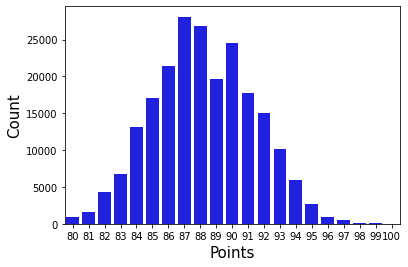

In [76]:
import seaborn as sns
g = sns.countplot(x='points', data=df_sent, color='blue')
g.set_xlabel("Points", fontsize=15)
g.set_ylabel("Count", fontsize=15)